# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
import os
import csv
output_data_file = "output_data/cities.csv"
if not os.path.exists("output_data"):
    os.mkdir("output_data")
if not os.path.exists("Images"):
    os.mkdir("Images")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_keys.api_key}&units={units}&q="

lat = []
lng = []
maxtemp = []
wind = []
humid = []
cloud = []
date = []
country = []
town = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval\n-----------------------------")
city_num = 0
for city, zone in zip(cities,countries):
    response = requests.get(query_url + city+ "," + zone).json()
    if response["cod"] == 200:
        city_num +=1
        print(f"Processing Record {city_num} of Set 1 | {city}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        town.append(response['name'])
    else:
        print("City not found. Skipping...")
    time.sleep(2)

with open(output_data_file, 'w', newline='') as weather_file:
    city_writer = csv.writer(weather_file, delimiter=',')
    city_writer.writerow(["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
    city_writer.writerows(zip(town, cloud, country, date, humid, lat, lng, maxtemp, wind))

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | alugan
Processing Record 2 of Set 1 | oume
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | labuhan
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | nieuw amsterdam
Processing Record 8 of Set 1 | hvide sande
Processing Record 9 of Set 1 | channel-port aux basques
Processing Record 10 of Set 1 | khatanga
City not found. Skipping...
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | haines junction
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | cabinda
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | bl

Processing Record 181 of Set 1 | sao joao da barra
Processing Record 182 of Set 1 | cherskiy
Processing Record 183 of Set 1 | vardo
Processing Record 184 of Set 1 | talcahuano
Processing Record 185 of Set 1 | sungairaya
Processing Record 186 of Set 1 | hamilton
Processing Record 187 of Set 1 | belmonte
Processing Record 188 of Set 1 | tara
Processing Record 189 of Set 1 | cap malheureux
Processing Record 190 of Set 1 | andenes
Processing Record 191 of Set 1 | mahebourg
Processing Record 192 of Set 1 | monteagudo
Processing Record 193 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 194 of Set 1 | muzhi
Processing Record 195 of Set 1 | norman wells
Processing Record 196 of Set 1 | ferme-neuve
Processing Record 197 of Set 1 | peleduy
Processing Record 198 of Set 1 | jimma
Processing Record 199 of Set 1 | nenjiang
Processing Record 200 of Set 1 | fort smith
Processing Record 201 of Set 1 | kodinsk
Processing Record 202 of Set 1 | byron bay
Processing Record 203 of Set 1 

Processing Record 358 of Set 1 | san vicente
Processing Record 359 of Set 1 | chapada dos guimaraes
City not found. Skipping...
Processing Record 360 of Set 1 | guangyuan
City not found. Skipping...
Processing Record 361 of Set 1 | keflavik
Processing Record 362 of Set 1 | almaznyy
City not found. Skipping...
Processing Record 363 of Set 1 | sindor
Processing Record 364 of Set 1 | vanimo
Processing Record 365 of Set 1 | mahibadhoo
Processing Record 366 of Set 1 | shar
Processing Record 367 of Set 1 | comodoro rivadavia
Processing Record 368 of Set 1 | nakapiripirit
Processing Record 369 of Set 1 | guiyang
Processing Record 370 of Set 1 | pierre
Processing Record 371 of Set 1 | ondjiva
Processing Record 372 of Set 1 | maragogi
Processing Record 373 of Set 1 | constitucion
Processing Record 374 of Set 1 | christchurch
Processing Record 375 of Set 1 | agidel
Processing Record 376 of Set 1 | kang
Processing Record 377 of Set 1 | pangkalanbuun
Processing Record 378 of Set 1 | kokopo
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.read_csv(output_data_file)
city_df.count()

City          512
Cloudiness    512
Country       508
Date          512
Humidity      512
Lat           512
Lng           512
Max Temp      512
Wind Speed    512
dtype: int64

In [5]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Alugan,92,PH,1545560191,100,12.22,125.48,76.45,4.63
1,Oume,90,CI,1545555600,94,6.38,-5.42,75.20,4.70
2,Hobart,75,AU,1545557400,45,-42.88,147.33,68.00,8.05
3,Labuhan,56,ID,1545560197,58,-2.54,115.51,85.90,4.79
4,Jamestown,68,SH,1545560163,100,-15.94,-5.72,70.51,15.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

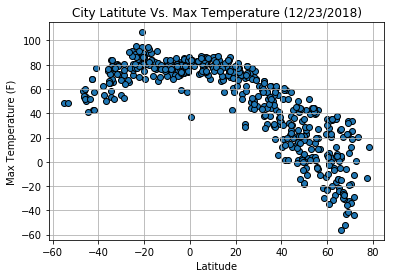

In [19]:
import datetime
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", edgecolor = "k")
plt.title(f"City Latitute Vs. Max Temperature ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#Save the image
temp_file = os.path.join("Images","Lat Vs Temp.png")
plt.savefig(temp_file, bbox_inches='tight')

plt.show()

### Analysis
From the scatter plot, we can see that temperature increases as the latitude increases for cities with negative latitudes, then it starts decreasing after latitude 0

#### Latitude vs. Humidity Plot

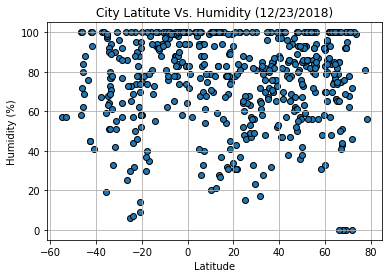

In [20]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", edgecolor = "k")
plt.title(f"City Latitute Vs. Humidity ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#Save the image
hum_file = os.path.join("Images","Humidity Vs Temp.png")
plt.savefig(hum_file)

plt.show()

### Analysis
There is no correlation between the latitutde and humidity level for the cities. However, we can notice that there is high humidity in general for the cities

#### Latitude vs. Cloudiness Plot

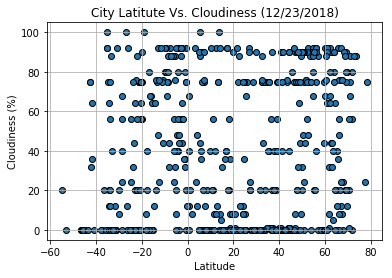

In [21]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", edgecolor = "k")
plt.title(f"City Latitute Vs. Cloudiness ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save the image
cloud_file = os.path.join("Images","Cloud Vs Temp.png")
plt.savefig(cloud_file)

plt.show()

### Analysis
There is no apparent correlation between the latitude and the cloudiness. 

#### Latitude vs. Wind Speed Plot

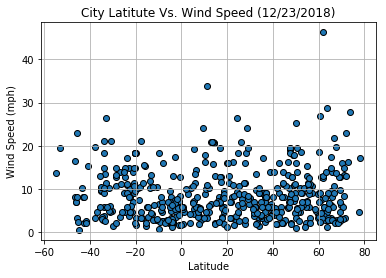

In [22]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", edgecolor = "k")
plt.title(f"City Latitute Vs. Wind Speed ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#Save the image
wind_file = os.path.join("Images","Wind Vs Temp.png")
plt.savefig(wind_file)

plt.show()

### Analysis
There is no apparent correlation between latitude and wind speed. However, most of the cities have wind speed lower than 20 MPH